<h1 style="font-size:30px;">Arithmetic Operations</h1>

In this notebook we will cover **arithmetic operations** which includes addition, subtraction and multiplication of images by a scalar. We will also take a look at some unexpected results that ocurr when performing such operations and how to resolve them.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import Image

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/f8ae3j0nbrflife/AAAy-WwcREtWOGgoEbFLDPANa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

### <font style="color:rgb(50,120,230)">Read and display original image</font>

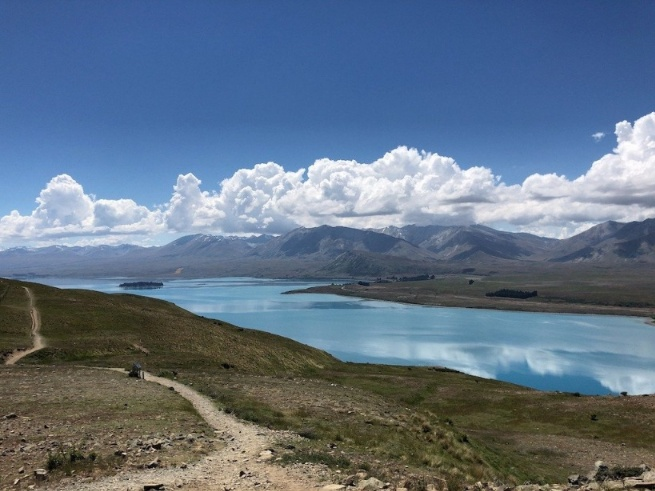

In [2]:
image = 'new-zealand-lake.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Display the image.
Image(filename=image, width='400')

# 1. Addition / Subtraction:  Changes the Image Brightness
Adding a constant value to the intensity of each pixel in an image will increase the brightness of the image. Likewise, subtracting a constant value from each pixel will decrease the brighhtness of an image. We can use the **`add()`** and **`subtract()`** functions in OpenCV to perform these operations on images. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
dst = cv2.add(src1, src2[, dst[, mask[, dtype]]])

```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **2 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array of or a scalar the same size and the same type as src1.

The function has **2 optional argument**:
1. `mask`: optional operation mask - 8-bit single channel array, that specifies elements of the output array to be changed.
2. `dtype`: optional depth of the output array.

### <font color="green">OpenCV Documentation</font>


[**`add()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6)
[**`subtract()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gaa0f00d98b4b5edeaeb7b8333b2de353b)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Adjust the brightness of an image<font/>

Text(0.5, 1.0, 'Brighter')

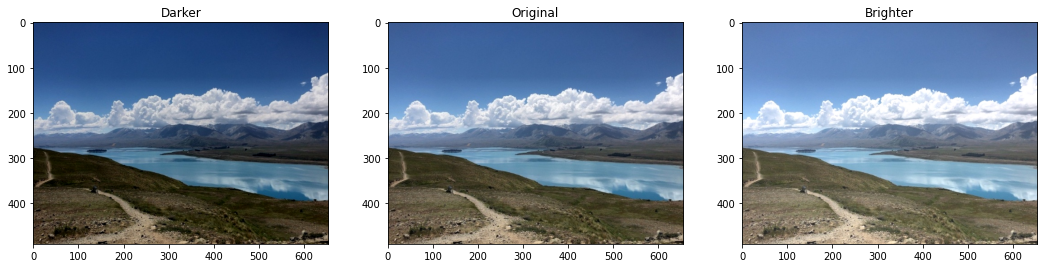

In [3]:
# Create a matrix with constant intensity.
matrix = np.ones(img.shape, dtype = 'uint8') * 30

# Create brighter and darker images.
img_brighter = cv2.add(img, matrix)
img_darker   = cv2.subtract(img, matrix)

# Display the images
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]);   plt.title('Darker')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);          plt.title('Original')
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brighter')

# 2. Multiplication: Changes the Image Contrast
Multiplying the intensity values of an image by a constant value (greater or less than 1) will change the contrast of the image. Contrast is defined by the difference in the intensity values within an image. Consider the blue lake and the darker foreground in the image. Let's say the intensity of the lake is 150 and that of the foreground is 100. We perceive the difference between these two values as a measure of the contrast in the image. In this case, the difference is 50. Multiplying each by a factor of 1.5 would result in 225 for the lake and 150 for the foreground. The resulting difference after this multiplication is now 75 which has a higher contrast compared to the original image. Multiplying by a factor less than one results in a lower contrast image.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
dst = cv2.multiply(src1, src2[, dst[, scale[, dtype]]])
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **2 required arguments**:

1. `src1`: first input array.
2. `src2`: second input array of the same size and the same type as src1.

The function has **2 optional argument**:
1. `scale`: optional scale factor.
2. `dtype`: optional depth of the output array.

### <font color="green">OpenCV Documentation</font>


[**`multiply()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga979d898a58d7f61c53003e162e7ad89f)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Modify the image contrast<font/> 

Text(0.5, 1.0, 'Higher Contrast')

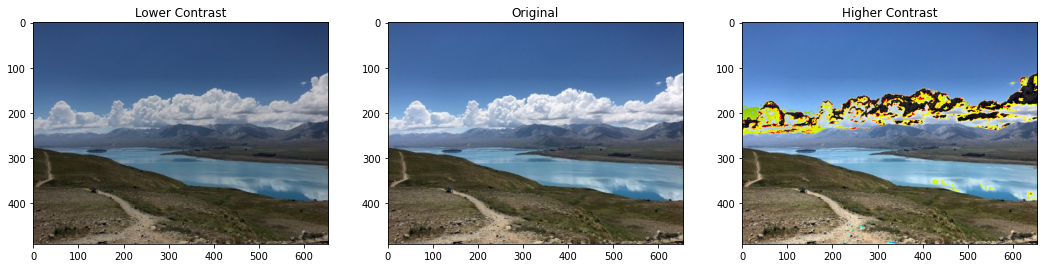

In [4]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower  = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast')

### <font style="color:rgb(50,120,230)">What happened?</font>
Notice that the high contrast image above has some strange colors in the clouds. When the original image was multiplied by the scale factor, some pixel intensity values exceeded 255. So when those floating-point values were converted to 8-bit unsigned integers using `np.uint8()`, an overflow condition occurred and the conversion to `uint8` wraps the values back to 0. For example, `np.uint8(265.2)` converts the floating point value of 265.2 to 9. You can verify this with the following command: `print(np.uint8(265.2))`

So, how can we overcome this?

### <font style="color:rgb(50,120,230)">Handling Overflow using np.clip()</font>
The overflow condition can be handled by using the **`np.clip()`** function to clip the multiplied values to a specified range prior to converting to **`uint8`**.

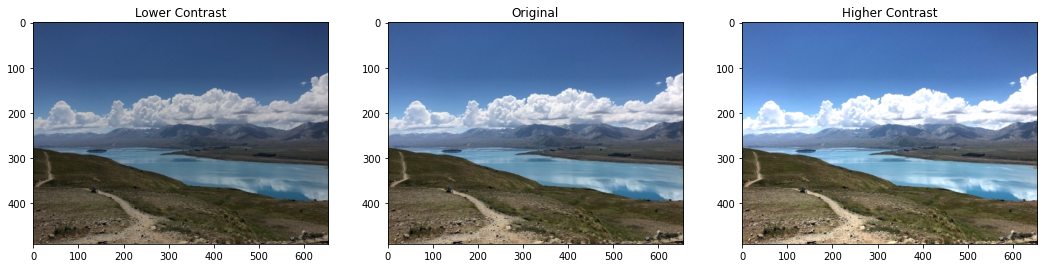

In [5]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2) , 0, 255))

# Display the images.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

### <font style="color:rgb(50,120,230)">Using the scale option</font>

Text(0.5, 1.0, 'Higher Contrast')

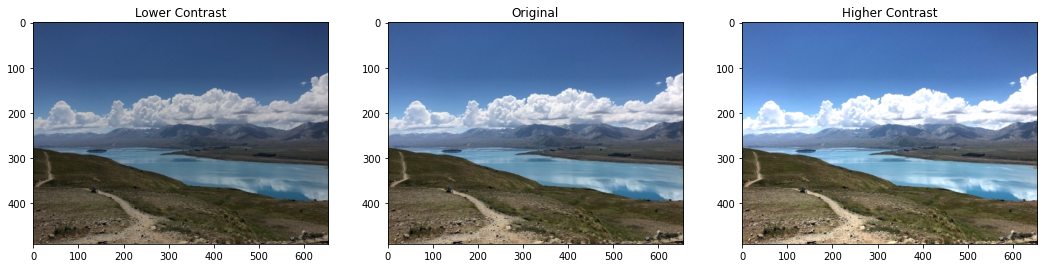

In [6]:
# Create matrices with a constant scale factor.
matrix_ones = np.ones(img.shape, dtype = 'float64')

# Create lower and higher contrast images.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale = 0.8))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale = 1.2) , 0, 255))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast')

# 3. Exercise
Please complete the code in the cell below.

In [7]:
# Read the image ('Santorini.jpg')
image = 'Santorini.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Create a matrix of ones (with data type float64)
# matrix_ones = 

# Create two higher contrast images using the 'scale' option with factors of 1.1 and 1.2 (without overflow fix)
# YOUR CODE HERE
# img_higher1  = 
# img_higher2  = 

# Display the images (original, higher (1.1x) , high (1.2x))
# UNCOMMENT the lines below.
# plt.figure(figsize=[18,5])
# plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
# plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x)')
# plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x)')

# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
# YOUR CODE HERE
# img_higher1  = 
# img_higher2  = 

# Display the images (original, higher (1.1x) clipped , high (1.2x) clipped)
# UNCOMMENT the lines below.
# plt.figure(figsize = [18,5])
# plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
# plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
# plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped')

Your results should look like this.
![Exercise-01](https://opencv.org/wp-content/uploads/2021/08/c0-m2-Exercise-01.png)